# Niezawodność Systemów

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



## II Zadania

### Zad. 1

In [34]:
#R(t) = e^-(t/eta)*beta
delta_t = 4
def R(t, beta=1.5, eta=40):
    return np.exp(-1*(t/eta)**beta)

In [35]:
df = pd.DataFrame(columns=["T[h]", "R(t)", "E(T)"])
df

,T[h],R(t),E(T)


In [36]:
df["T[h]"] = range(4, 44, 4)
df

,T[h],R(t),E(T)
0,4,NaN,NaN
1,8,NaN,NaN
2,12,NaN,NaN
3,16,NaN,NaN
4,20,NaN,NaN
5,24,NaN,NaN
6,28,NaN,NaN
7,32,NaN,NaN
8,36,NaN,NaN
9,40,NaN,NaN


In [37]:
df["R(t)"] = R(df["T[h]"])
df

,T[h],R(t),E(T)
0,4,0.968872,NaN
1,8,0.914441,NaN
2,12,0.848473,NaN
3,16,0.776482,NaN
4,20,0.702189,NaN
5,24,0.628287,NaN
6,28,0.556737,NaN
7,32,0.488927,NaN
8,36,0.425787,NaN
9,40,0.367879,NaN


In [38]:
df

,T[h],R(t),E(T)
0,4,0.968872,NaN
1,8,0.914441,NaN
2,12,0.848473,NaN
3,16,0.776482,NaN
4,20,0.702189,NaN
5,24,0.628287,NaN
6,28,0.556737,NaN
7,32,0.488927,NaN
8,36,0.425787,NaN
9,40,0.367879,NaN


In [39]:
et = []
et.append(delta_t*df["R(t)"][0])
for each in range(1, len(df["R(t)"].to_list())):
    et.append(delta_t*df["R(t)"][each] + et[each-1])
et

[3.8754879773603017,
 7.53325055178917,
 10.927143394909912,
 14.033070167412383,
 16.84182417271862,
 19.354972697954615,
 21.581921375707083,
 23.537630025207427,
 25.24077988080349,
 26.712297645489258]

In [40]:
df["E(T)"] = et
df

,T[h],R(t),E(T)
0,4,0.968872,3.875488
1,8,0.914441,7.533251
2,12,0.848473,10.927143
3,16,0.776482,14.033070
4,20,0.702189,16.841824
5,24,0.628287,19.354973
6,28,0.556737,21.581921
7,32,0.488927,23.537630
8,36,0.425787,25.240780
9,40,0.367879,26.712298


## Oczekiwany czas pracy elementu w przedziale od 0 do 40h wynosu 26,71h.

## Oczekiwany czas pracy elementu w przedziale od 0 do 20h wynosu 16.84.

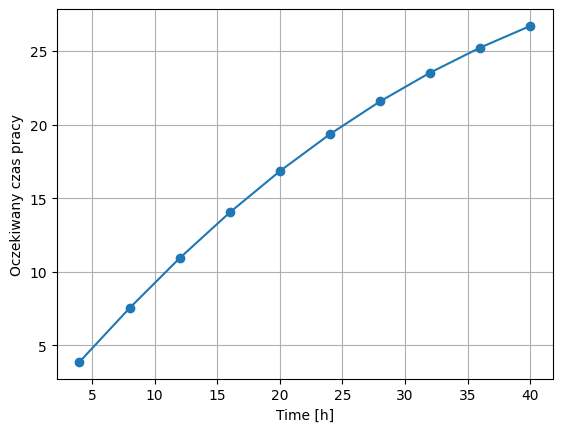

In [41]:
plt.plot(df["T[h]"], df["E(T)"], "o-")
plt.grid("True")
plt.xlabel("Time [h]")
plt.ylabel("Oczekiwany czas pracy")
plt.show()

### Zad. 2

In [48]:
df2 = pd.DataFrame(
    columns=[
        "Oznaczenie elementu",
        "beta",
        "eta",
        "koszt wymiany korekcyjnej [zl]",
        "koszt wymiany profilaktycznej [zl]",
        "Strategia obsługi",
    ]
)

In [49]:
df2["Oznaczenie elementu"] = ["A", "B", "C", "D"]
df2["beta"] = [1, 2.5, 2, 2]
df2["eta"] = [80] * 4
df2["koszt wymiany korekcyjnej [zl]"] = [500, 400, 300, 600]
df2["koszt wymiany profilaktycznej [zl]"] = [200, 500, 300, 400]
df2["Strategia obsługi"] = ["KOREKCYJNA", "KOREKCYJNA", "KOREKCYJNA", "PROFILAKTYCZNA"]
df2

,Oznaczenie elementu,beta,eta,koszt wymiany korekcyjnej [zl],koszt wymiany profilaktycznej [zl],Strategia obsługi
0,A,1.0,80,500,200,KOREKCYJNA
1,B,2.5,80,400,500,KOREKCYJNA
2,C,2.0,80,300,300,KOREKCYJNA
3,D,2.0,80,600,400,PROFILAKTYCZNA


In [53]:
def calc_eod_t(fbeta, feta, dt, n=40):
    tdf = pd.DataFrame(columns=["T[h]", "R(t)", "E(T)"])
    tdf["T[h]"] = range(dt, n + dt, dt)
    tdf["R(t)"] = R(tdf["T[h]"], beta=fbeta, eta=feta)
    et = []
    et.append(dt * tdf["R(t)"][0])
    for each in range(1, len(tdf["R(t)"].to_list())):
        et.append(dt * tdf["R(t)"][each] + et[each - 1])
    tdf["E(T)"] = et
    return tdf

In [54]:
calc_eod_t(1.5, 40, delta_t)

,T[h],R(t),E(T)
0,4,0.968872,3.875488
1,8,0.914441,7.533251
2,12,0.848473,10.927143
3,16,0.776482,14.033070
4,20,0.702189,16.841824
5,24,0.628287,19.354973
6,28,0.556737,21.581921
7,32,0.488927,23.537630
8,36,0.425787,25.240780
9,40,0.367879,26.712298


### Zad. 2

In [57]:
df3 = calc_eod_t(fbeta=3, feta=150, n=300, dt=1)
kk = 8
kp = 2
df3

,T[h],R(t),E(T)
0,1,1.000000,1.000000
1,2,0.999998,1.999997
2,3,0.999992,2.999989
3,4,0.999981,3.999970
4,5,0.999963,4.999933
...,...,...,...
295,296,0.000460,133.441675
296,297,0.000425,133.442101
297,298,0.000393,133.442494
298,299,0.000363,133.442857


In [68]:
df3["F(t)"] = 1 - df3["R(t)"]
df3["Kp(T)"] = (kp*df3["R(t)"])/(df3["E(T)"])
df3["Kk(T)"] = (kk*df3["F(t)"])/(df3["E(T)"])
df3["CPUT(T)"] = df3["Kp(T)"] + df3["Kk(T)"]
df3

,T[h],R(t),E(T),F(t),Kp(T),Kk(T),CPUT(T)
0,1,1.000000,1.000000,2.962963e-07,2.000000,0.000002,2.000002
1,2,0.999998,1.999997,2.370368e-06,0.999999,0.000009,1.000008
2,3,0.999992,2.999989,7.999968e-06,0.666664,0.000021,0.666685
3,4,0.999981,3.999970,1.896278e-05,0.499994,0.000038,0.500032
4,5,0.999963,4.999933,3.703635e-05,0.399991,0.000059,0.400050
...,...,...,...,...,...,...,...
295,296,0.000460,133.441675,9.995400e-01,0.000007,0.059924,0.059931
296,297,0.000425,133.442101,9.995746e-01,0.000006,0.059926,0.059932
297,298,0.000393,133.442494,9.996067e-01,0.000006,0.059927,0.059933
298,299,0.000363,133.442857,9.996367e-01,0.000005,0.059929,0.059934


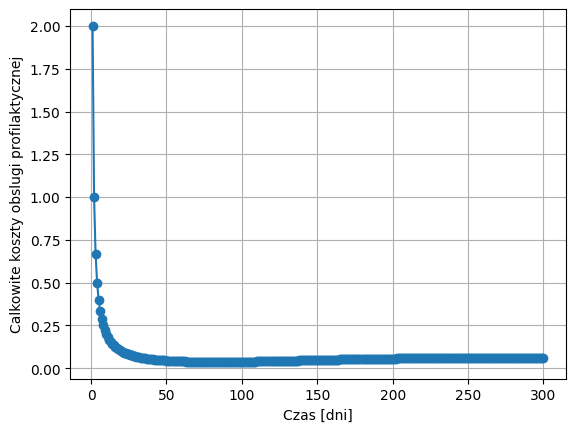

In [69]:
plt.plot(df3["T[h]"], df3["CPUT(T)"], "o-")
plt.grid("True")
plt.xlabel("Czas [dni]")
plt.ylabel("Calkowite koszty obslugi profilaktycznej")
plt.show()

In [70]:
df3.loc[df3["CPUT(T)"] == df3["CPUT(T)"].min()]

,T[h],R(t),E(T),F(t),Kp(T),Kk(T),CPUT(T)
82,83,0.844156,79.569868,0.155844,0.021218,0.015669,0.036887


#### Optymalnym czasem miedzyobslugowym T jest 83 dni

### Zad 4

In [71]:
kk = 4650
kp = 2050
beta = 2.3
eta = 72_000
delta_t = 100
# df4 = pd.DataFrame(columns=["Koszt wymiany korekcyjnej"]
df4 = calc_eod_t(fbeta=beta, feta=eta, n=120_000, dt=delta_t)
df4

,T[h],R(t),E(T)
0,100,1.000000,99.999973
1,200,0.999999,199.999841
2,300,0.999997,299.999506
3,400,0.999994,399.998856
4,500,0.999989,499.997770
...,...,...,...
1195,119600,0.040234,63168.115172
1196,119700,0.039986,63172.113761
1197,119800,0.039739,63176.087680
1198,119900,0.039494,63180.037053


In [72]:
df4["F(t)"] = 1 - df4["R(t)"]
df4["Kp(T)"] = (kp*df4["R(t)"])/(df4["E(T)"])
df4["Kk(T)"] = (kk*df4["F(t)"])/(df4["E(T)"])
df4["CPUT(T)"] = df4["Kp(T)"] + df4["Kk(T)"]
df4

,T[h],R(t),E(T),F(t),Kp(T),Kk(T),CPUT(T)
0,100,1.000000,99.999973,2.680003e-07,20.500000,0.000012,20.500012
1,200,0.999999,199.999841,1.319787e-06,10.249995,0.000031,10.250025
2,300,0.999997,299.999506,3.353617e-06,6.833322,0.000052,6.833374
3,400,0.999994,399.998856,6.499378e-06,5.124981,0.000076,5.125057
4,500,0.999989,499.997770,1.085835e-05,4.099974,0.000101,4.100075
...,...,...,...,...,...,...,...
1195,119600,0.040234,63168.115172,9.597661e-01,0.001306,0.070651,0.071957
1196,119700,0.039986,63172.113761,9.600141e-01,0.001298,0.070665,0.071963
1197,119800,0.039739,63176.087680,9.602608e-01,0.001289,0.070679,0.071968
1198,119900,0.039494,63180.037053,9.605063e-01,0.001281,0.070692,0.071974


In [74]:
df4.loc[df4["CPUT(T)"] == df4["CPUT(T)"].min()]

,T[h],R(t),E(T),F(t),Kp(T),Kk(T),CPUT(T)
602,60300,0.514239,50173.692684,0.485761,0.021011,0.045019,0.06603


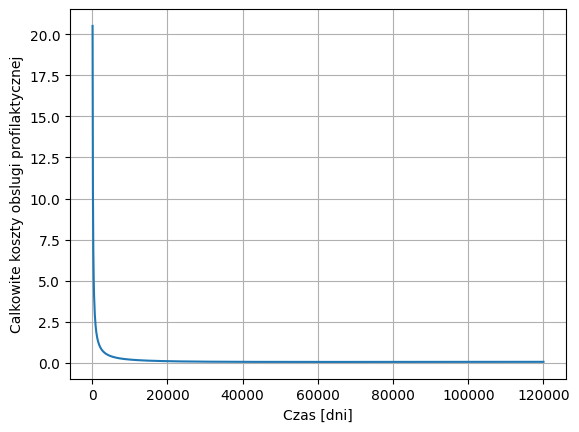

In [75]:
plt.plot(df4["T[h]"], df4["CPUT(T)"])
# plt.plot(df4["T[h]", ])
plt.grid("True")
plt.xlabel("Czas [dni]")
plt.ylabel("Calkowite koszty obslugi profilaktycznej")
plt.show()